In [94]:
import pandas as pd # type: ignore

In [95]:
df = pd.read_csv("newdata.csv")

In [96]:
df.head()

,Exam Result,Other online courses,Student background,Working Status
0,pass,y,maths,nw
1,fail,n,maths,w
2,fail,y,maths,w
3,pass,y,cs,nw
4,fail,n,other,w


In [97]:
features = [ 'Other online courses', 'Student background','Working Status']
target_feature = "Exam Result"

In [98]:
df

,Exam Result,Other online courses,Student background,Working Status
0,pass,y,maths,nw
1,fail,n,maths,w
2,fail,y,maths,w
3,pass,y,cs,nw
4,fail,n,other,w
5,fail,y,other,w
6,pass,y,maths,nw
7,pass,y,cs,nw
8,pass,n,maths,w
9,pass,n,cs,w


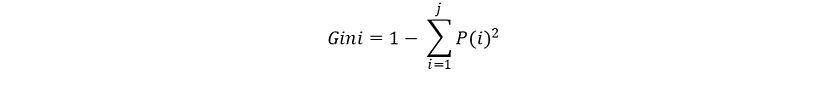

In [99]:
target_values = ["pass","fail"]

In [100]:
class DecisionTreeNode:
    def __init__(self,subtrees=None, value=None,right=None,left=None,depth=None):
        self.subtrees = subtrees  # Subtrees for different feature values
        self.value = value  # Value to return if this node is a leaf node
        self.right=right
        self.left=left
        self.depth=depth


In [101]:
class Tree_classifier:
    def __init__(self, depth=None):
        self.depth = depth  # Maximum depth of the decision tree
        self.tree = None 

    def gini(self,feature_data, target_values, target_feature):
        print(target_feature)
        g_value = 0
        denom = len(feature_data)
        for tv  in target_values:
            num = len(feature_data[feature_data[target_feature]==tv])

            g_value += (num/denom)**2
        g_value = 1 - g_value
        return g_value
    def feature_wise_gini(self,df, features, target_values, target_feature):
        feature_name=[]
        low_gini=[]
        subtrees={}
        minimum_gini=None
        if self.depth == 0 :
                return DecisionTreeNode(subtrees=None)
        for ft in features:
            
            ft_gini = 0
        
            for feature_value,group in df.groupby(ft):
                g_value = self.gini(group, target_values,target_feature)
                ft_gini += (len(group)/len(df)*g_value)
                print(f"{ft} - {feature_value} = {g_value}")        
                
            low_gini.append(ft_gini)
            feature_name.append(ft)
        # print("hi nivi this", ft)
            print(f"Feature column: {ft} gini value = {ft_gini}\n")

            

        if len(low_gini)==0:
            return None
        else:
            minimum_gini=min(low_gini)
            index=low_gini.index(minimum_gini)
            low_feature=feature_name[index]
            features.remove(low_feature)
            self.depth-=1
            for feature_value,group in df.groupby(low_feature):
                print("*****************",feature_value)
                if feature_value=="maths":
                    DecisionTreeNode= self.feature_wise_gini(df[df[low_feature]=="maths"], features, target_values, target_feature)
                elif feature_value=="cs":
                    DecisionTreeNode= self.feature_wise_gini(df[df[low_feature]=="cs"], features, target_values, target_feature) 
                elif feature_value=="other":
                    DecisionTreeNode= self.feature_wise_gini(df[df[low_feature]=="other"], features, target_values, target_feature) 
                else :
                    DecisionTreeNode=self.feature_wise_gini(df, features, target_values, target_feature) 
                    
    def visualize_tree(node, depth=0):
        if node is None:
            return
        print("  " * depth, end="")
        if node.feature_index is None:
            print("Leaf, Predicted Class:", node.value)
        else:
            print("Feature:", features[node.feature_index], ", Threshold:", node.threshold)
            print("  " * depth, "Subtrees:")
            for value, subtree in node.subtrees.items():
                print("  " * (depth + 1), f"Value: {value}")
                visualize_tree(subtree, depth + 2)
            

In [102]:
low_gini=[]
feature_name=[]
my_clf = Tree_classifier(depth=4)
my_clf.feature_wise_gini(df, features, target_values, target_feature)

#print(tree)



Exam Result
Other online courses - n = 0.48979591836734704
Exam Result
Other online courses - y = 0.46875
Feature column: Other online courses gini value = 0.47857142857142865

Exam Result
Student background - cs = 0.0
Exam Result
Student background - maths = 0.48979591836734704
Exam Result
Student background - other = 0.0
Feature column: Student background gini value = 0.22857142857142862

Exam Result
Working Status - nw = 0.2777777777777777
Exam Result
Working Status - w = 0.4444444444444444
Feature column: Working Status gini value = 0.37777777777777777

***************** cs
Exam Result
Other online courses - n = 0.0
Exam Result
Other online courses - y = 0.0
Feature column: Other online courses gini value = 0.0

Exam Result
Working Status - nw = 0.0
Exam Result
Working Status - w = 0.0
Feature column: Working Status gini value = 0.0

***************** n
Exam Result
Working Status - nw = 0.0
Exam Result
Working Status - w = 0.0
Feature column: Working Status gini value = 0.0

******

In [103]:
#1. depth 2 -> 3 branches (maths, cs, other)
def Tree_structure(df,low_gini):
#maths: 
    feature_wise_gini(df[df["Student background"]=="maths"], ['Other online courses', 'Working Status'], ["pass","fail"], "Exam Result",low_gini)
#cs:       
    feature_wise_gini(df[df["Student background"]=="cs"], ['Other online courses', 'Working Status'], ["pass","fail"], "Exam Result",low_gini)
#other:
    feature_wise_gini(df[df["Student background"]=="other"], ['Other online courses', 'Working Status'], ["pass","fail"], "Exam Result",low_gini)